In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    'font.serif': 'Computer Modern',
})

# Alfa de Cronbach

Definición usando la varianza:
\begin{equation}
    \alpha = \frac{k}{k-1}
    \left(1-{\dfrac{\sum_{i=1}^{k}\sigma_{y_i}^{2}}{S_{y}^{2}}}\right)
\end{equation}

* $k$ es el número de preguntas o ítems.
* $S_{y_i}^{2}$ es la varianza asociada al ítem $i$.
* $S_{y}^{2}$ es la varianza de los valores totales observados, $y=\sum_{i=1}^k y_i$

Definición usando la matriz de correlación:
\begin{equation}
    \alpha = \dfrac{k\,\bar{c}}{1 + \bar{c}(k - 1)}
\end{equation}

* $\bar{c}$ el promedio de las correlaciones lineales entre cada uno de los items ($k(k-1)/2$ valores)

In [3]:
def cronbach_alpha(preguntas, standarized=False):
    k = preguntas.shape[1] # Total de preguntas
    if standarized: # Usando la matriz de correlacion
        cm = preguntas.corr() # Correlation matrix
        # Obtener los elementos de la matriz triangular superior. 
        tri_up = cm.values[np.triu_indices(cm.shape[0], k=1)] # La matriz es simétrica y no necesitamos la diagonal
        mean = np.mean(tri_up) # Promedio de los valores
        alpha = round((k * mean) / (1 + (k - 1) * mean), 3)
    else: # Usando las varianzas
        resultados = preguntas.sum(axis=1) # Resultados de cada test
        varianzas_preguntas = preguntas.var(axis=0) # Obtener varianza por pregunta
        varianza_resultados = resultados.var(axis=0) # Varianza de los resultados
        varianza_preguntas = varianzas_preguntas.sum(axis=0) # Varianza de las preguntas
        alpha = round(k / (k - 1) * (1 - varianza_preguntas / varianza_resultados), 3)
    return alpha

In [4]:
def analysis(data, disc):
    columnas_preguntas = ['P' + str(i) for i in range(1, 13)]
    preguntas = data[columnas_preguntas + ['Nota']] # Seleccionar solo preguntas
    correctas = preguntas.sum(axis=0) # Correctas por pregunta
    N = preguntas.shape[0] # Total de datos
    preguntas_ordenadas = preguntas.sort_values('Nota') # Ordenar datos por nota
    peores = preguntas_ordenadas.iloc[:disc][columnas_preguntas] # Obtener los peores resultados
    mejores = preguntas_ordenadas.iloc[-disc:][columnas_preguntas] # Obtener los mejores resultados
    discriminacion = mejores.mean(axis=0) - peores.mean(axis=0)
    dificultad = correctas[columnas_preguntas] / N
    dd = np.vstack([correctas[columnas_preguntas], dificultad, discriminacion])
    return pd.DataFrame(dd, columns=list(discriminacion.index), index=['Correctas', 'Dificultad', 'Discriminación'])

In [5]:
def correlation_matrix(corr_matrix):
    cols = corr_matrix.columns
    plt.figure(figsize=(10, 10),)
    plt.matshow(corr_matrix, fignum=1)
    plt.xticks(range(len(cols)), cols, rotation='vertical', fontsize=14)
    plt.yticks(range(len(cols)), cols, fontsize=14)
    plt.colorbar()
    plt.show()

# Lectura de datos

In [6]:
DATA_DIR = './data/'
results_2023_1 = DATA_DIR + '2023-1.csv'
results_2023_2 = DATA_DIR + '2023-2.csv'

In [7]:
data_2023_1 = pd.read_csv(results_2023_1)
data_2023_2 = pd.read_csv(results_2023_2)
data_2023_1['Duración'] = pd.to_timedelta(data_2023_1['Duración']).dt.total_seconds() # Duración a segundos
data_2023_2['Duración'] = pd.to_timedelta(data_2023_2['Duración']).dt.total_seconds() # Duración a segundos
# Reemplazamos los valores nulos con 0.
data_2023_1 = data_2023_1.fillna(0) 
data_2023_2 = data_2023_2.fillna(0) 

## Descripción datos 2023-1

In [8]:
data_2023_1.describe()

,Duración,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,Puntaje Matemática M1,Puntaje Matemática M2,Certamen 1,Abstracción,Descomposición,Patrones,Algoritmos,Aprobación C1,Nota Final,Aprobación Asignatura
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,...,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,2794.530612,0.369388,0.586735,0.557143,0.308163,0.606122,0.383673,0.807143,0.683673,0.490816,...,658.027551,459.090816,41.641837,55.238095,61.768707,56.054422,54.370748,0.414286,50.805102,0.560204
std,642.480100,0.482885,0.492671,0.496978,0.461970,0.488858,0.486528,0.394743,0.465279,0.500171,...,278.569207,205.695390,33.224209,30.854365,33.904551,30.220117,29.856099,0.492850,33.196966,0.496616
min,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,588.000000,402.000000,8.000000,33.333333,33.333333,33.333333,33.333333,0.000000,14.000000,0.000000
50%,2820.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,728.000000,493.000000,40.000000,66.666667,66.666667,66.666667,50.000000,0.000000,65.000000,1.000000
75%,3300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,862.000000,587.000000,72.000000,66.666667,100.000000,66.666667,66.666667,1.000000,79.000000,1.000000
max,4080.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1000.000000,903.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000,100.000000,1.000000


### Distribución de resultados

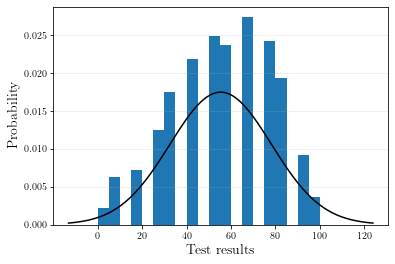

In [9]:
data_2023_1['Nota'].hist(grid=False, density=True, bins=20)
mu = 55.37
sigma = 22.82 
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='k')
plt.xlabel(r'Test results', fontsize=14)
plt.ylabel(r'Probability', fontsize=14)
plt.grid(axis='y', alpha=.25)
plt.show()
#plt.savefig('histogram.pdf', dpi=400, bbox_inches='tight')

## Descripción datos 2023-2

In [10]:
data_2023_2.describe()

,Duración,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,Respondidas,Puntaje,Nota,Certamen 1
count,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000
mean,4521.250000,0.544956,0.481360,0.637061,0.256579,0.660088,0.418860,0.841009,0.717105,0.572368,0.755482,0.777412,0.536184,11.858553,7.198465,59.987215,46.316886
std,18589.582927,0.498248,0.499927,0.481111,0.436985,0.473939,0.493643,0.365869,0.450653,0.495007,0.430037,0.416212,0.498963,0.747299,2.512554,20.937954,31.676594
min,1080.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,8.330000,0.000000
25%,2100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,12.000000,5.000000,41.670000,20.000000
50%,2400.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,7.000000,58.330000,47.000000
75%,2700.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,9.000000,75.000000,75.000000
max,192540.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,12.000000,100.000000,100.000000


# Matriz de correlación

In [11]:
cm_2023_1 = data_2023_1.corr()
cm_2023_2 = data_2023_2.corr()

## 2023-1

In [12]:
cm_2023_1

,Duración,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,Puntaje Matemática M1,Puntaje Matemática M2,Certamen 1,Abstracción,Descomposición,Patrones,Algoritmos,Aprobación C1,Nota Final,Aprobación Asignatura
Duración,1.000000,0.019096,0.181245,0.125295,0.128476,0.108326,0.052861,0.192785,0.225605,0.090434,...,0.114237,0.113755,0.134401,0.148644,0.252174,0.162200,0.227279,0.134390,0.126617,0.118908
P1,0.019096,1.000000,-0.001709,0.039645,0.047826,0.076085,0.013522,-0.033147,0.038690,0.081726,...,0.007229,0.011025,0.075615,0.596714,0.002479,0.037912,0.044951,0.064502,0.063946,0.039213
P2,0.181245,-0.001709,1.000000,0.223787,0.263918,0.209848,0.146540,0.157005,0.142092,0.210494,...,0.248504,0.247196,0.347082,0.222067,0.253755,0.263131,0.769900,0.285157,0.351559,0.300099
P3,0.125295,0.039645,0.223787,1.000000,0.154572,0.130575,0.107784,0.173384,0.113590,0.160319,...,0.135632,0.163445,0.241607,0.160317,0.206573,0.221783,0.533305,0.199340,0.211768,0.182633
P4,0.128476,0.047826,0.263918,0.154572,1.000000,0.207834,0.168744,0.158197,0.145086,0.158142,...,0.167299,0.177154,0.293098,0.228225,0.246458,0.246683,0.718116,0.250720,0.231042,0.181735
P5,0.108326,0.076085,0.209848,0.130575,0.207834,1.000000,0.103492,0.182919,0.161210,0.210776,...,0.250798,0.232935,0.265631,0.678685,0.257361,0.251468,0.274370,0.220093,0.251248,0.232412
P6,0.052861,0.013522,0.146540,0.107784,0.168744,0.103492,1.000000,0.109107,0.117043,0.106839,...,0.090007,0.092665,0.168636,0.106409,0.138808,0.643098,0.210251,0.098950,0.149397,0.153728
P7,0.192785,-0.033147,0.157005,0.173384,0.158197,0.182919,0.109107,1.000000,0.234773,0.216067,...,0.147223,0.142294,0.216697,0.199042,0.288058,0.613165,0.237713,0.169586,0.190751,0.160894
P8,0.225605,0.038690,0.142092,0.113590,0.145086,0.161210,0.117043,0.234773,1.000000,0.268413,...,0.131629,0.118651,0.230936,0.238867,0.689486,0.313116,0.207475,0.193448,0.196977,0.201860
P9,0.090434,0.081726,0.210494,0.160319,0.158142,0.210776,0.106839,0.216067,0.268413,1.000000,...,0.151692,0.154736,0.241584,0.288834,0.328631,0.703110,0.264327,0.197771,0.213697,0.203728


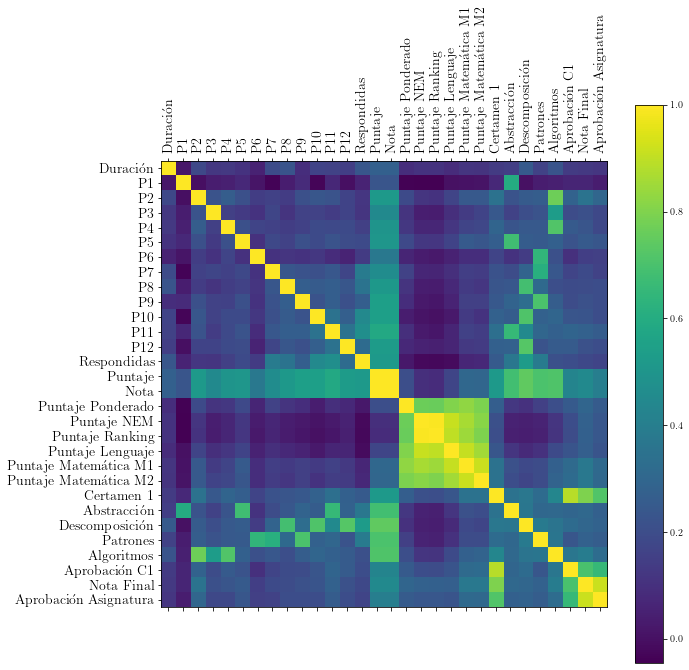

In [13]:
correlation_matrix(cm_2023_1)

## 2023-2

In [14]:
cm_2023_2

,Duración,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,Respondidas,Puntaje,Nota,Certamen 1
Duración,1.000000,0.029431,-0.000322,-0.008003,-0.020001,0.009590,0.012163,-0.117275,-0.087601,-0.044038,-0.120705,-0.129286,-0.048030,-0.500128,-0.088120,-0.088116,-0.040682
P1,0.029431,1.000000,0.144388,0.116223,0.113337,0.083377,0.079560,0.048285,0.012704,0.078033,0.069291,0.077419,0.015526,-0.002066,0.352808,0.352809,0.092120
P2,-0.000322,0.144388,1.000000,0.247953,0.303300,0.204874,0.120632,0.094805,0.122737,0.171797,0.098764,0.135664,0.095119,-0.005596,0.518110,0.518113,0.195188
P3,-0.008003,0.116223,0.247953,1.000000,0.187585,0.218988,0.160115,0.095873,0.153717,0.108104,0.095843,0.193635,0.157651,0.043296,0.511873,0.511872,0.169112
P4,-0.020001,0.113337,0.303300,0.187585,1.000000,0.177766,0.152592,0.090656,0.090285,0.157647,0.088888,0.127258,0.098336,0.023862,0.472450,0.472453,0.147487
P5,0.009590,0.083377,0.204874,0.218988,0.177766,1.000000,0.125960,0.143782,0.124902,0.179832,0.168036,0.133541,0.135621,0.071753,0.500107,0.500113,0.144570
P6,0.012163,0.079560,0.120632,0.160115,0.152592,0.125960,1.000000,0.101709,0.099011,0.113901,0.152053,0.149746,0.094380,0.050683,0.441790,0.441793,0.058683
P7,-0.117275,0.048285,0.094805,0.095873,0.090656,0.143782,0.101709,1.000000,0.159650,0.145425,0.108453,0.134977,0.148801,0.198692,0.383041,0.383048,0.097173
P8,-0.087601,0.012704,0.122737,0.153717,0.090285,0.124902,0.099011,0.159650,1.000000,0.146003,0.090142,0.214032,0.192024,0.174402,0.435479,0.435475,0.122476
P9,-0.044038,0.078033,0.171797,0.108104,0.157647,0.179832,0.113901,0.145425,0.146003,1.000000,0.121893,0.198149,0.093827,0.112273,0.470771,0.470767,0.135012


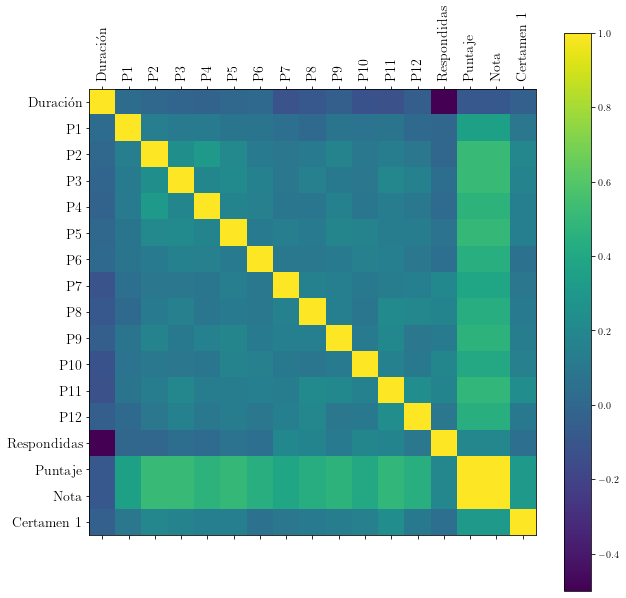

In [15]:
correlation_matrix(cm_2023_2)

# Análisis

## 2023-1

In [16]:
analysis(data_2023_1, 266) 

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12
Correctas,362.000000,575.000000,546.000000,302.000000,594.000000,376.000000,791.000000,670.000000,481.000000,658.000000,668.000000,488.000000
Dificultad,0.369388,0.586735,0.557143,0.308163,0.606122,0.383673,0.807143,0.683673,0.490816,0.671429,0.681633,0.497959
Discriminación,0.259398,0.669173,0.601504,0.578947,0.590226,0.428571,0.421053,0.548872,0.695489,0.624060,0.661654,0.669173


In [17]:
preguntas = ['P' + str(i) for i in range(1, 13)]

Todas las preguntas

In [18]:
cronbach_alpha(data_2023_1[preguntas]), cronbach_alpha(data_2023_1[preguntas], True)

(0.695, 0.697)

Sin pregunta 1

In [19]:
cronbach_alpha(data_2023_1[list(set(preguntas)-{'P1'})])

0.716

Sin pregunta 4

In [20]:
cronbach_alpha(data_2023_1[list(set(preguntas)-{'P4'})])

0.673

Sin pregunta 7

In [21]:
cronbach_alpha(data_2023_1[list(set(preguntas)-{'P7'})])

0.675

## 2023-2

In [22]:
analysis(data_2023_2, int(round(910*0.27)))

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12
Correctas,497.000000,439.000000,581.000000,234.000000,602.000000,382.000000,767.000000,654.000000,522.000000,689.000000,709.000000,489.000000
Dificultad,0.544956,0.481360,0.637061,0.256579,0.660088,0.418860,0.841009,0.717105,0.572368,0.755482,0.777412,0.536184
Discriminación,0.418699,0.642276,0.642276,0.508130,0.556911,0.512195,0.321138,0.495935,0.601626,0.422764,0.516260,0.556911


In [23]:
cronbach_alpha(data_2023_2[preguntas]), cronbach_alpha(data_2023_2[preguntas], True)

(0.645, 0.648)